# Using `xarray` to parse the data

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
from pathlib import Path
from src.dnbr import apply_bit_mask_group, apply_bitmask

In [3]:
# Get list of files
sherlock_path = "/mnt/sherlock/oak/prescribed_data/raw/landsat-c2-l2-post-buf/"
paths_to_pre = list(Path(sherlock_path).rglob("*.nc4"))

### Open the dataset

In [4]:
ds = (
    xr.open_dataset(paths_to_pre[60])
    .to_array() # transform to an array rather than the xr.Dataset
    .squeeze()  # just like in numpy, remove all singletons
)
ds

<xarray.DataArray (time: 16, band: 6, y: 245, x: 293)>
array([[[[10177., 10285., 10535., ..., 11116., 11102., 10985.],
         [10286., 10420., 10608., ..., 10832., 10982., 10724.],
         [10504., 10685., 10779., ..., 10938., 10939., 10601.],
         ...,
         [17485., 24872., 29598., ..., 10610., 10672., 10705.],
         [18503., 41814., 55260., ..., 10917., 11018., 10808.],
         [13824., 16279., 18245., ..., 11506., 11496., 11421.]],

        [[11041., 11268., 11714., ..., 12755., 12181., 12340.],
         [11333., 11595., 11867., ..., 12477., 12487., 12180.],
         [11634., 11986., 12146., ..., 12675., 12636., 11983.],
         ...,
         [19068., 21973., 23593., ..., 11901., 11935., 11979.],
         [20539., 26460., 26596., ..., 12253., 12358., 11989.],
         [14301., 18463., 20211., ..., 13013., 12992., 12734.]],

        [[11590., 11813., 12229., ..., 13678., 13385., 13317.],
         [11825., 12060., 12283., ..., 13337., 13436., 12830.],
         [12126., 12505., 12702., ..., 13561., 13512., 12589.],
         ...,
...
         ...,
         [11824., 12314., 12454., ..., 14921., 15260., 15828.],
         [ 9648., 11032., 11414., ..., 13736., 14006., 14945.],
         [ 8619.,  9915., 10533., ..., 14347., 14228., 14291.]],

        [[14812., 15049., 15855., ..., 16224., 16303., 16107.],
         [15202., 15344., 15782., ..., 16362., 16237., 15419.],
         [15893., 16436., 16577., ..., 16578., 16161., 15452.],
         ...,
         [12231., 12892., 13152., ..., 14273., 14366., 14836.],
         [ 9989., 11556., 11959., ..., 14280., 14546., 14377.],
         [ 8434.,  9925., 10906., ..., 16207., 16400., 15829.]],

        [[ 5440.,  5440.,  5440., ...,  5440.,  5440.,  5440.],
         [ 5440.,  5440.,  5440., ...,  5440.,  5440.,  5440.],
         [ 5440.,  5440.,  5440., ...,  5440.,  5440.,  5440.],
         ...,
         [ 5451.,  5444.,  5440., ...,  5440.,  5440.,  5440.],
         [ 5504.,  5472.,  5454., ...,  5440.,  5440.,  5440.],
         [ 5496.,  5498.,  5504., ...,  5440.,  5440.,  5440.]]]])
Coordinates: (12/17)
  * time                      (time) datetime64[ns] 2003-06-03T18:03:05.33303...
    id                        (time) object ...
  * band                      (band) object 'blue' 'green' ... 'qa_pixel'
  * x                         (x) float64 -118.4 -118.4 -118.4 ... -118.3 -118.3
  * y                         (y) float64 37.14 37.14 37.14 ... 37.08 37.08
    platform                  object ...
    ...                        ...
    landsat:scene_id          (time) object ...
    title                     (band) object ...
    common_name               (band) object ...
    full_width_half_max       (band) float64 ...
    epsg                      int64 ...
    variable                  <U42 'stackstac-30e817adafdff1be03335a5eb10d09b5'

### Slicing and selecting data

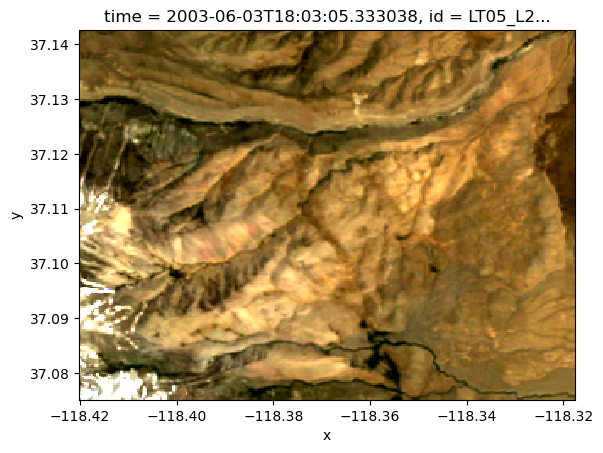

In [5]:
ds.sel(band=["red", "green", "blue"]).isel(time=0).plot.imshow(robust=True)

### You can also aggregate across the time dimension and get a composite

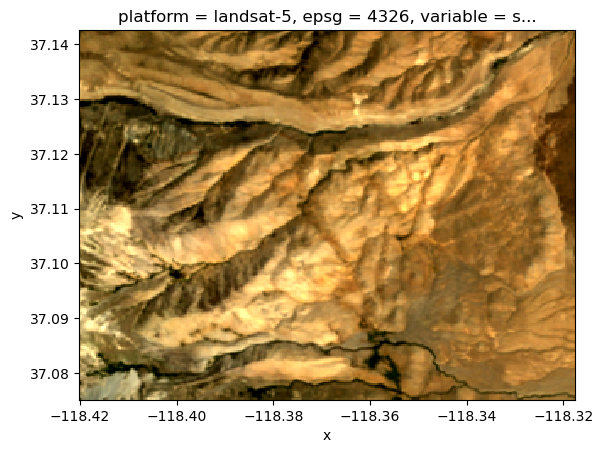

In [7]:
ds.median(dim="time").sel(band=["red", "green", "blue"]).plot.imshow(robust=True)

Often with composites, we want to solve issues like cloud coverage or bad pixels, but is good to do some QA cleaning per each satellite type. 

In [10]:
ds_clean = apply_bit_mask_group(ds).compute()

Exception: len() of unsized object. Maybe platform length is zero: landsat-5


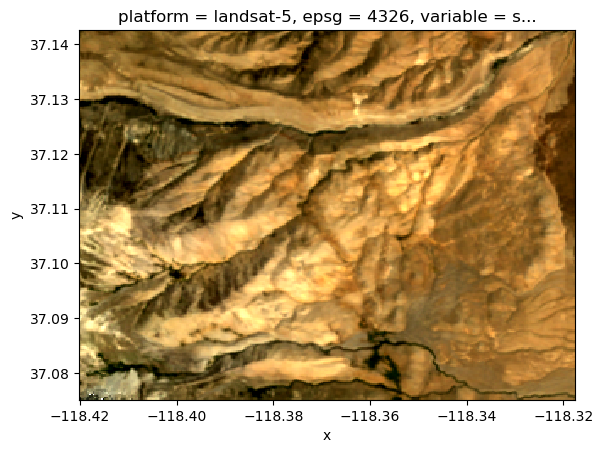

In [9]:
ds_clean.compute().median(dim="time").sel(band=["red", "green", "blue"]).plot.imshow(robust=True)